In [81]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [82]:
#Generating synthetic dataset 
X,y = skd.make_regression(n_samples=100, n_features=1, n_targets=1, bias=0.5, noise=5.5, random_state=42)

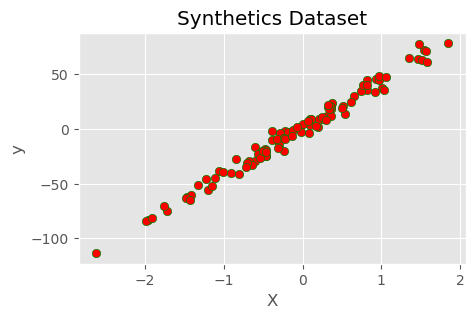

In [83]:
plt.figure(figsize = (5,3))
plt.style.use('ggplot')
plt.scatter(X[:,0], y, color='red', edgecolor='green')
#plt.scatter(X[:,1], y)
plt.title('Synthetics Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [84]:
#preparing the Tensor dataset
inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype = torch.float32)
dataset = TensorDataset(inputs, targets)

In [85]:
#train, test and validation set formation
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

dataset_size = int(len(dataset))
train_size = int(train_ratio * dataset_size)
test_size = int(test_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#finding the shape of the dataset
data, label = next(iter(train_dataset))

print(data.shape, label.shape)

torch.Size([1]) torch.Size([])


In [86]:
#Define the Neural Network for Regression
class Regression(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(n_inputs, 50)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, n_outputs)
        
    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

In [87]:
#Creating the model, loss function and optimizer
model = Regression(n_inputs = 1, n_outputs=1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()

In [88]:
#Batch processing the training, validation and testsets
train_loader = DataLoader(train_dataset, batch_size = 10, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 10)
test_loader = DataLoader(test_dataset, batch_size = 10)

In [89]:
#List to store training and validation losses and accuracies
train_losses = []
val_losses = []
#train_accuracies = []
#val_accuracies = []

#Training loop
for epoch in range(100):
    model.train()
    running_loss = 0.0
    total = 0
    for data, label in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        total += label.size(0) 
    avg_loss = running_loss / total
    
    print(f'Epoch: {epoch + 1}, Average Loss = {avg_loss}')
    


/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Average Loss = 154.94244384765625
Epoch: 2, Average Loss = 153.02909502301898
Epoch: 3, Average Loss = 155.31119210379464
Epoch: 4, Average Loss = 152.6264892578125
Epoch: 5, Average Loss = 153.30104108537947
Epoch: 6, Average Loss = 152.66134207589286
Epoch: 7, Average Loss = 152.48053850446428
Epoch: 8, Average Loss = 152.4990025111607
Epoch: 9, Average Loss = 151.99769723074778
Epoch: 10, Average Loss = 151.78092912946428
Epoch: 11, Average Loss = 151.58538033621653
Epoch: 12, Average Loss = 153.19988577706474
Epoch: 13, Average Loss = 152.24407043457032
Epoch: 14, Average Loss = 151.65923549107143
Epoch: 15, Average Loss = 151.85495256696427
Epoch: 16, Average Loss = 151.98753574916296
Epoch: 17, Average Loss = 152.21349051339286
Epoch: 18, Average Loss = 151.6998055594308
Epoch: 19, Average Loss = 151.64780796595983
Epoch: 20, Average Loss = 149.0534188406808
Epoch: 21, Average Loss = 151.86788678850448
Epoch: 22, Average Loss = 151.19943062918526
Epoch: 23, Average Loss